In [310]:
import pandas as pd
import matplotlib.pyplot as plt
from sktime.forecasting.base import ForecastingHorizon
# import numpy as np
# from datetime import datetime, timedelta

In [311]:

# Read the CSV file into a DataFrame
df = pd.read_csv('./AirtrafficA4.csv')

df['PASSENGERS CARRIED'] = df['PASSENGERS CARRIED'].str.replace(',', '').astype(float)
df.fillna(0, inplace=True)


# create column for year_month
d = {'JAN': '01', 'FEB': '02', 'MAR': '03', 'APR': '04', 'MAY': '05', 'JUNE': '06', 'JULY': '07', 'AUG': '08', 'SEP': '09', 'OCT': '10', 'NOV': '11', 'DEC': '12'}
df['MONTH'] = df['MONTH'].str.replace(' ', '')
df['year_month'] = df['YEAR'].astype(str) + "-" + df['MONTH'].map(d).astype(str)
df['year_month'] = pd.to_datetime(df['year_month'], format='%Y-%m')
df['year_month_period'] = df['year_month'].dt.to_period("M")

df.sort_values(by=['year_month'], inplace=True)
df.reset_index(inplace=True)

df.head(80)


,index,AIRLINE,YEAR,MONTH,TOTAL DEPARTURES,HOURS FLOWN,KILOMETRE FLOWN,PASSENGERS CARRIED,AVAILABLE SEAT KILOMETRE (IN THOUSAND),FREIGHT CARRIED (IN TONNE),MAIL CARRIED (IN TONNE),year_month,year_month_period
0,116,A007,2013,JAN,"10,552","18,655","10,112",1408012.0,"18,20,105","6,465.00",0,2013-01-01,2013-01
1,117,A007,2013,FEB,"9,873","17,374","9,439",1341210.0,"16,98,930","6,235.00",0,2013-02-01,2013-02
2,118,A007,2013,MAR,"11,393","20,093","11,028",1423569.0,"19,84,886","6,505.00",0,2013-03-01,2013-03
3,119,A007,2013,APR,"11,426","20,084","11,090",1511094.0,"19,96,084","5,903.00",0,2013-04-01,2013-04
4,120,A007,2013,MAY,"11,885","20,779","11,533",1685168.0,"20,75,882","7,345.00",0,2013-05-01,2013-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,47,A007,2019,APR,"37,911","66,485","34,807",5481088.0,"61,51,697","18,918.90","1,557.5",2019-04-01,2019-04
76,48,A007,2019,MAY,"39,934","70,246","36,494",5979551.0,"64,58,545","20,557.90","1,610.3",2019-05-01,2019-05
77,49,A007,2019,JUNE,"38,698","68,381","35,379",5778376.0,"62,81,020","19,024.60","1,548.6",2019-06-01,2019-06
78,50,A007,2019,JULY,"39,883","70,629","35,699",5693448.0,"63,02,625","20,020.00","1,730.2",2019-07-01,2019-07


d:\IITB-Sem3_courses\CS215\Assignments\Assignment4\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


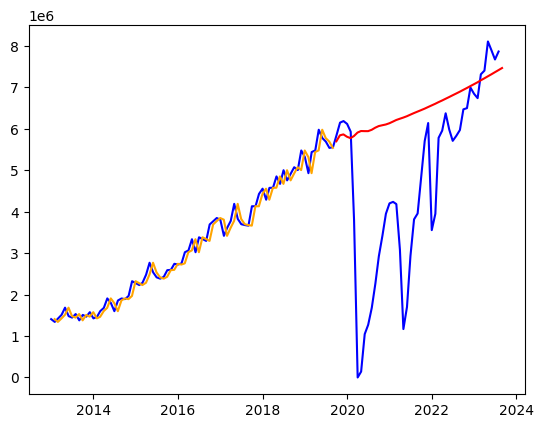

In [312]:
from sktime.forecasting.arima import ARIMA
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# using arima

# Prepare the data for ARIMA model
y = df.set_index('year_month_period')['PASSENGERS CARRIED']
# print(y.head(50))
# forecasting horizon
fh = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2023-09", periods=12, freq="ME")), is_relative=False
)

# # Fit the ARIMA model
forecaster = ARIMA(order=(3, 1, 9))
forecaster.fit(y)
prediction = forecaster.predict(fh)

# # Sarimax model
# model = SARIMAX(y, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
# result = model.fit()
# prediction = result.predict(start=len(y), end=len(y)+12 - 1)

## prediction for covid part
y1 = df.head(80).set_index('year_month_period')['PASSENGERS CARRIED']
fh1 = ForecastingHorizon(
    pd.PeriodIndex(pd.date_range("2019-09", periods=48, freq="ME")), is_relative=False
)
forecaster = ARIMA(order=(5, 2, 0))
forecaster.fit(y1)
prediction = forecaster.predict(fh1)

plt.plot(df['year_month'], df['PASSENGERS CARRIED'], color='blue')
plt.plot(prediction, color='red')
plt.plot(y1, color='orange')
plt.show()



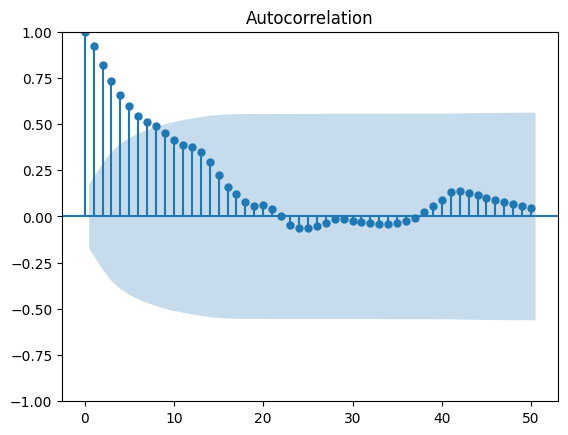

In [313]:
from statsmodels.graphics.tsaplots import plot_acf

# Calculate and plot the ACF
plot_acf(y, lags=50)
plt.show()

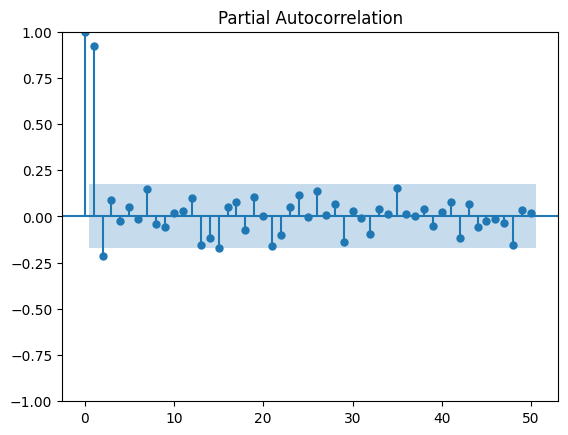

In [314]:
from statsmodels.graphics.tsaplots import plot_pacf

# Calculate and plot the PACF
plot_pacf(y, lags=50)
plt.show()

In [315]:
# prepare submission_2.csv

periods = ['2023 SEP', '2023 OCT', '2023 NOV', '2023 DEC', '2024 JAN', '2024 FEB', '2024 MAR', '2024 APR', '2024 MAY', '2024 JUN', '2024 JUL', '2024 AUG']
df_prediction = pd.DataFrame({
    'YEAR_MONTH' : periods,
    'PASSENGERS CARRIED' : prediction.values
    })
df_prediction.to_csv('submission_2.csv', index=False)

ValueError: All arrays must be of the same length